## How to generate a pre-tumor state for 3D MRI Scans of glioma infected brains using the tissue-reconstruction package

### Prerquesites
- you have to clone/install this repository and create you python script here in the main directory
- you need the path to your patient Scan where you want to reconstruct a pre-tumor state 
- you need to have installed the packages mentioned in requirements.txt (mainly the antspyx package)

### Tutorial

1. import ants and the the tissue_reconstruction module inside the tissue_reconsturciton folder
    Currently tissue_reconstruction is not uploaded to PyPi or such. Therefore your script will have to be in this main folder or you add the path to this folder to sys.path

In [2]:
import ants
import os

# When working with jupyter ntoebook instead of a python file the working directory needs to be added to the bpath variable manually
import sys
sys.path.append("../") 

from tissue_reconstruction import tissue_reconstruction


print(sys.path)

['/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/home/andy/Documents/UNI Alt/SS24/Arbeit/brain-tumor-tissue-reconstruction/.venv/lib/python3.12/site-packages', '../']


2. Load the Image you want to reconstruct. The module works with and expects ANT-Images.

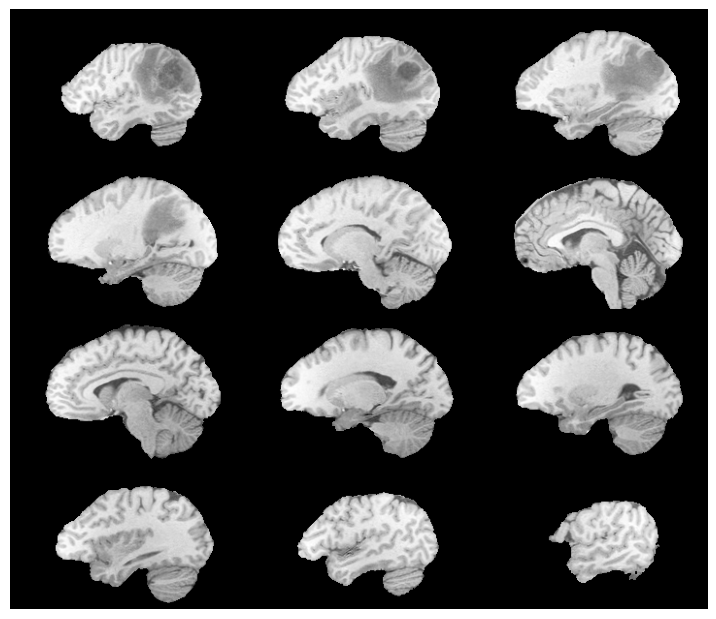

In [5]:
# Replace here the path to your Scan
path_to_patient = os.path.join("tissue_reconstruction", "data", "sample_patient.nii.gz")

patient_img = ants.image_read(path_to_patient)

patient_img.plot()

3. Use the modules **reconstruct_pre_tumor_tissue** function to start the process

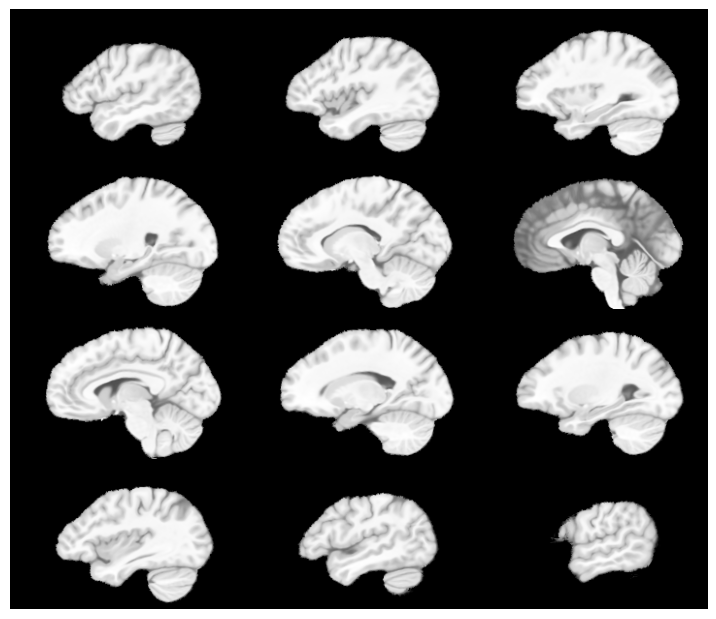

In [ ]:
results = tissue_reconstruction.reconstruct_pre_tumor_tissue(patient_img)

# The function returns a dict with the different results. It takes about 2 minutes

reconstructed_patient_img = results["t1"]

# show the generated pre-tumor image
reconstructed_patient_img.plot()

4. If you want to reconstruct a pre-tumor state in other modalities specify the flags in the function

In [7]:
results = tissue_reconstruction.reconstruct_pre_tumor_tissue(patient_img, transform_DTI=True, transform_tissue_segementation=True)

# The results Dict now also contains the transformed atlas in the specified modalities
# This might take a m inute longer

#### The Dict contains the following
Always:
- "T1" -> The Transformed T1 atlas (The generated reconstructed )
- "Transformation" -> Path to the Transformations created during the registration (Affine and Warp)

when transform_DTI was set to true:
- "fiber_tracts_FA" -> A scalar image of the patients fiber tracts
- "fiber_tracts_tensor" -> A tensor image of the patients fiber tractations

when transform_tissue_segmentation was set to true.
- "TS" -> The tissue segmenation into WM, GM and CSF
- "WM" -> The probability map for WM 
- "GM" -> The probability map for GM
- "CSF" -> The probability map fpr CSF 

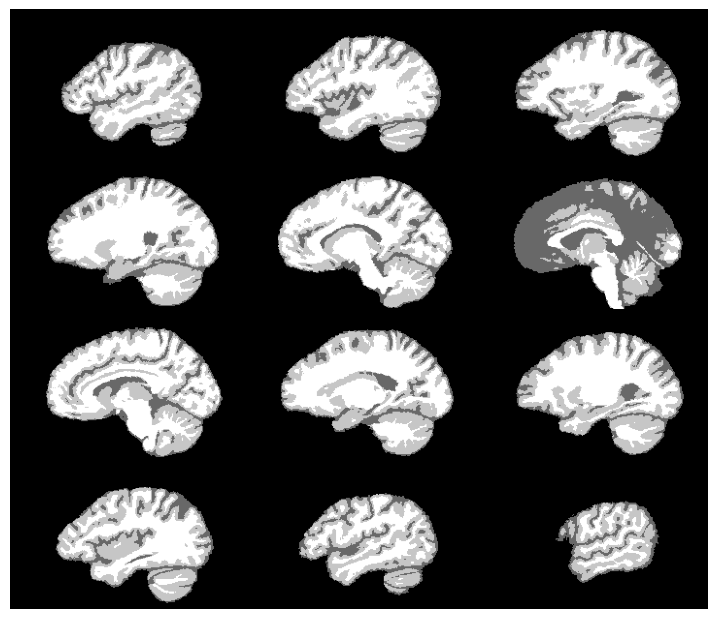

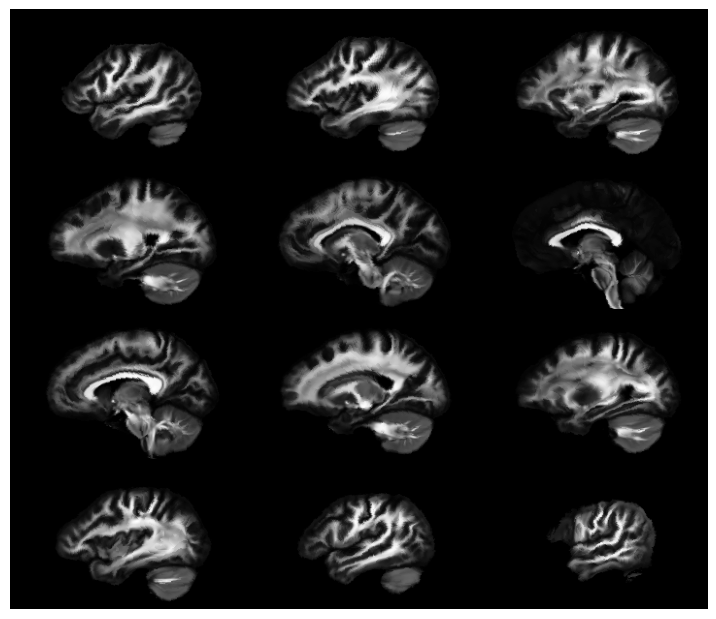

In [ ]:
reconstructed_tissue_segemnetation = results["TS"]
reconstructed_fiber_tracts_scalar = results["fiber_tracts_FA"]
# Showing some of the other results
reconstructed_tissue_segemnetation.plot()
reconstructed_fiber_tracts_scalar.plot()

6. The module allows for easy storage of the dict's contents

In [11]:
# Specify the output folder

output_folder = "outputs"

tissue_reconstruction.save_results(results, output_folder)

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tmpvwjz4hgh1Warp.nii.gz'